# Assignment 12
Our goal is to see if we can use an autoencoder to remove noise.


# Task 1: Get the data
Use the ae_emnist_simple.ipynb to get the data.   Include the code from the code block under "Subselect just the digits"

In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)

import numpy as np
import scipy.io as sio
#
# See this for more info: https://arxiv.org/pdf/1702.05373.pdf
mat = sio.loadmat('/fs/scratch/PAS1759/emnist/matlab/emnist-byclass.mat')
print("Loaded .mat dataset!")


data = mat['dataset']

ex_train = data['train'][0,0]['images'][0,0]
ey_train = data['train'][0,0]['labels'][0,0]
ex_test = data['test'][0,0]['images'][0,0]
ey_test = data['test'][0,0]['labels'][0,0]

ex_train = ex_train.reshape( (ex_train.shape[0], 28,28), order='F')
ex_test = ex_test.reshape( (ex_test.shape[0], 28,28), order='F')

ex_train = ex_train.reshape( (ex_train.shape[0], 784))
ex_test = ex_test.reshape( (ex_test.shape[0], 784))
ex_train = ex_train.astype('float32') / 255.
ex_test = ex_test.astype('float32') / 255.

2.3.1
2.4.0
Loaded .mat dataset!


In [2]:
import pandas as pd

df_train = pd.DataFrame(ex_train)
df_train['label'] = ey_train
df_digits_train = df_train[df_train['label']<=9]
x_train = df_digits_train.iloc[:,:784].values

y_train = df_digits_train['label'].values

df_test = pd.DataFrame(ex_test)
df_test['label'] = ey_test
df_digits_test = df_test[df_test['label']<=9]
x_test = df_digits_test.iloc[:,:784].values
y_test = df_digits_test['label'].values


In [ ]:
# x_train = x_train.reshape((x_train.shape[0],28,28,1))
# x_test = x_test.reshape((x_test.shape[0],28,28,1))

# Task 2: Add code for adding noise to images
Look at add_noise.ipynb for this.   Display 10 digits with and without noise.

In [3]:
# Get noise code
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

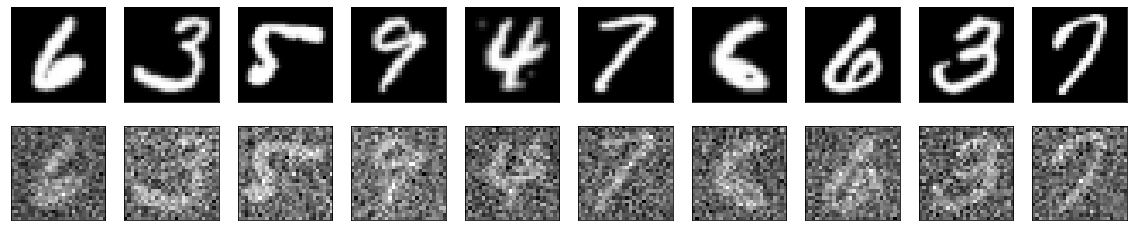

In [5]:
# display 10 images with and without noise
%matplotlib inline
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_train_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Task 3: Get Network from ae_mnist_simple
Get the autoencoder and train it.

Use:
* input_data = x_train
* target_data = x_train

Do the following:
* run network.predict on the x_test images:
          decoded_imgs = network.predict(x_test)

* Plot 10 x_test images and their decoded counterparts decoded_imgs (see Performance, Part II in ae_emnist_simple).

* run network.predict on the x_test_noisy images:
          decoded_imgs_noisy = network.predict(x_test_noisy)

* Plot 10 x_test_noisy images and their decoded counterparts decoded_imgs_noisy (see Performance, Part II in ae_emnist_simple).   
  
* **ALSO** plot the original x_test images (the ones that generated the x_test_noisy images) and the decoded_imgs_noisy.




In [5]:
# this is the size of our encoded representations
encoding_dim = 128  
#
# Define out model
network = keras.models.Sequential()
#
# This is the "encoder"
network.add(keras.layers.Dense(encoding_dim,activation='relu',input_shape=(28*28,)))
#
# This is the decoder
network.add(keras.layers.Dense(28*28,activation='sigmoid'))
#
# Now compile the network!
network.compile(optimizer='adam',loss='binary_crossentropy',metrics=['mse'])

## Fitting
Note that in fitting we use **x_train** for both the input features and the targets.

In [8]:
input_data = x_train
target_data = x_train

history = network.fit(input_data, target_data,
                epochs=25,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/25
1348/1348 [==============================] - 7s 5ms/step - loss: 0.1547 - mse: 0.0149 - val_loss: 0.1204 - val_mse: 0.0039
Epoch 2/25
1348/1348 [==============================] - 7s 5ms/step - loss: 0.1173 - mse: 0.0030 - val_loss: 0.1157 - val_mse: 0.0025
Epoch 3/25
1348/1348 [==============================] - 7s 5ms/step - loss: 0.1149 - mse: 0.0023 - val_loss: 0.1144 - val_mse: 0.0021
Epoch 4/25
1348/1348 [==============================] - 7s 5ms/step - loss: 0.1141 - mse: 0.0020 - val_loss: 0.1139 - val_mse: 0.0019
Epoch 5/25
1348/1348 [==============================] - 7s 5ms/step - loss: 0.1136 - mse: 0.0018 - val_loss: 0.1135 - val_mse: 0.0018
Epoch 6/25
1348/1348 [==============================] - 7s 5ms/step - loss: 0.1133 - mse: 0.0017 - val_loss: 0.1133 - val_mse: 0.0017
Epoch 7/25
1348/1348 [==============================] - 7s 5ms/step - loss: 0.1132 - mse: 0.0017 - val_loss: 0.1132 - val_mse: 0.0017
Epoch 8/25
1348/1348 [==============================] - 7s 5ms

## Apply model to non-noisy images
We apply the model and plot the original vs model output.

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

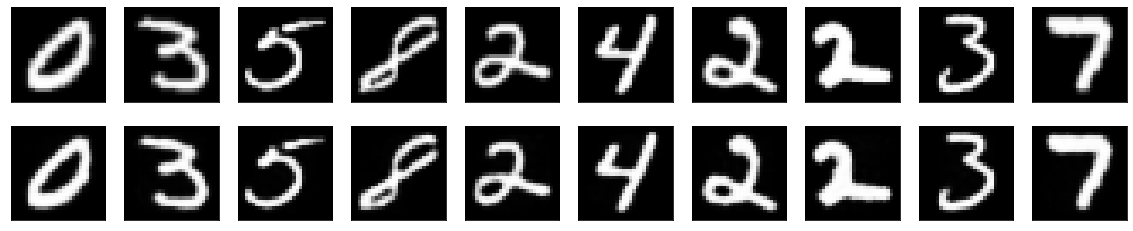

In [9]:
decoded_imgs = network.predict(x_test)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Apply model to noisy images
We apply the model to the **noisy** images and plot the original vs model output.

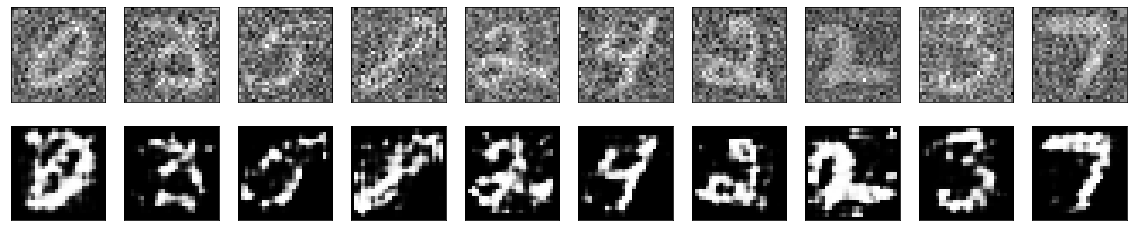

In [11]:
decoded_imgs_noisy = network.predict(x_test_noisy)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Now compare original to decoded noisy.

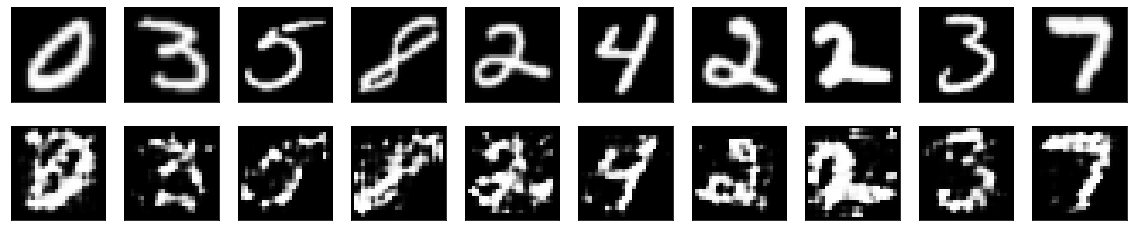

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Task 4: Now use the noisy images as the input when fitting

Use:
* input_data = x_train_noisy
* target_data = x_train

Do the following:
* run network.predict on the x_test_noisy images:
          decoded_imgs_noisy = network.predict(x_test_noisy)

* Plot 10 x_test images and their decoded counterparts decoded_imgs (see Performance, Part II in ae_emnist_simple).
  
* **ALSO** plot the original x_test images (the ones that generated the x_test_noisy images) and the decoded_imgs_noisy.


In [13]:
input_data = x_train_noisy
target_data = x_train

history = network.fit(input_data, target_data,
                epochs=25,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/25
1348/1348 [==============================] - 7s 5ms/step - loss: 97.1981 - mse: 0.1054 - val_loss: 60.4288 - val_mse: 0.0871
Epoch 2/25
1348/1348 [==============================] - 7s 5ms/step - loss: 93.1789 - mse: 0.1047 - val_loss: 57.6766 - val_mse: 0.0874
Epoch 3/25
1348/1348 [==============================] - 7s 5ms/step - loss: 88.0892 - mse: 0.1021 - val_loss: 54.0541 - val_mse: 0.0830
Epoch 4/25
1348/1348 [==============================] - 7s 5ms/step - loss: 82.3101 - mse: 0.0998 - val_loss: 49.9302 - val_mse: 0.0790
Epoch 5/25
1348/1348 [==============================] - 7s 5ms/step - loss: 76.2296 - mse: 0.0976 - val_loss: 46.1025 - val_mse: 0.0808
Epoch 6/25
1348/1348 [==============================] - 7s 5ms/step - loss: 70.3745 - mse: 0.0955 - val_loss: 42.2480 - val_mse: 0.0775
Epoch 7/25
1348/1348 [==============================] - 7s 5ms/step - loss: 65.0727 - mse: 0.0939 - val_loss: 38.8393 - val_mse: 0.0816
Epoch 8/25
1348/1348 [==========================

## Apply model to noisy images and compare decoded to input noisy

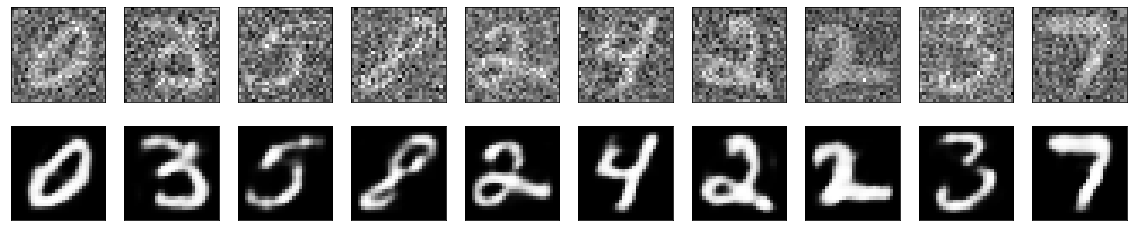

In [16]:
 decoded_imgs_noisy = network.predict(x_test_noisy)
    
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Compare decoded to input non-noisy

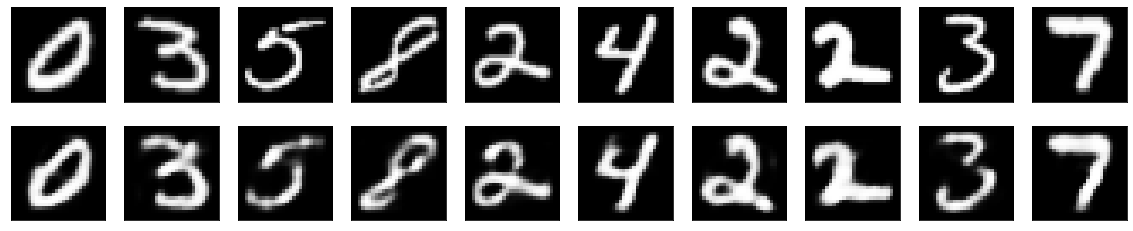

In [17]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Extra Credit: Now use the noisy images as the input AND the output when fitting

Use:
* input_data = x_train_noisy
* target_data = x_train_noisy

Do the following:
* run network.predict on the x_test_noisy images:
          decoded_imgs_noisy = network.predict(x_test_noisy)

* Plot 10 x_test_noisy images and their decoded counterparts decoded_imgs_noisy (see Performance, Part II in ae_emnist_simple).

* run network.predict on the x_test (non-noisy) images:
          decoded_imgs = network.predict(x_test)

* Plot 10 x_test images and their decoded counterparts decoded_imgs (see Performance, Part II in ae_emnist_simple).


In [6]:
input_data = x_train_noisy
target_data = x_train_noisy

history = network.fit(input_data, target_data,
                epochs=25,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/25
1348/1348 [==============================] - 8s 6ms/step - loss: -1.4857 - mse: 0.2729 - val_loss: 0.4298 - val_mse: 0.0195
Epoch 2/25
1348/1348 [==============================] - 7s 6ms/step - loss: -13.5561 - mse: 0.2814 - val_loss: 1.0723 - val_mse: 0.0225
Epoch 3/25
1348/1348 [==============================] - 7s 6ms/step - loss: -37.0030 - mse: 0.2882 - val_loss: 1.9075 - val_mse: 0.0252
Epoch 4/25
1348/1348 [==============================] - 7s 6ms/step - loss: -69.5999 - mse: 0.2932 - val_loss: 2.9205 - val_mse: 0.0287
Epoch 5/25
1348/1348 [==============================] - 7s 6ms/step - loss: -110.4480 - mse: 0.2973 - val_loss: 4.1830 - val_mse: 0.0306
Epoch 6/25
1348/1348 [==============================] - 7s 6ms/step - loss: -159.2383 - mse: 0.3010 - val_loss: 5.5520 - val_mse: 0.0357
Epoch 7/25
1348/1348 [==============================] - 7s 6ms/step - loss: -215.7815 - mse: 0.3045 - val_loss: 7.0528 - val_mse: 0.0386
Epoch 8/25
1348/1348 [========================

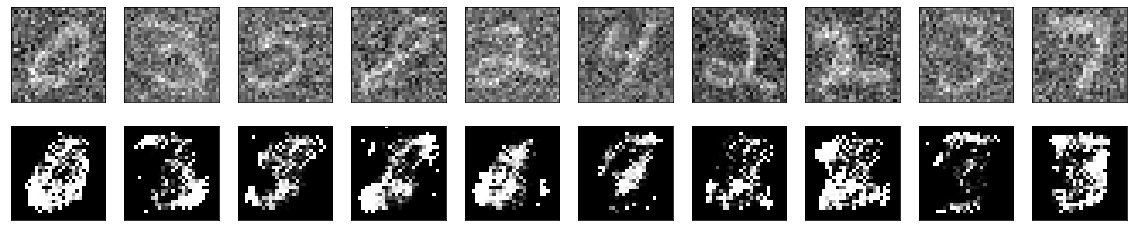

In [10]:
decoded_imgs_noisy = network.predict(x_test_noisy)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [11]:
decoded_imgs = network.predict(x_test)

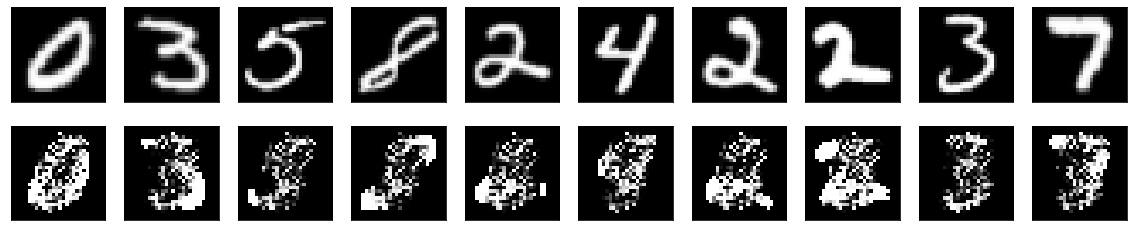

In [12]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()